In [1]:
import demes
import demesdraw
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
import msprime
import time
import numpy as np
import sys
import math
import tqdm
from matplotlib.pyplot import figure
import seaborn as sns
import tqdm
import pickle

Distribution Growth Model

In [27]:
# growth
def getGraph():
    b = demes.Builder(
    description="Distribution of published demographic models"
    )
    
    if round(uniform(0,100))<75:
        CEU_anc = "OUT"
        ANC_end_time = round(uniform(2265, 15000))
        CEU_start_time = round(uniform(2265,ANC_end_time-1))
    else:
        CEU_anc = "ANC"
        CEU_start_time = round(uniform(2000,3000))
        ANC_end_time = CEU_start_time
    # ranges    
    pulse_time = round(uniform(1000,2000)) 
    pulse_proportions = round(uniform(0.02, 0.05), 2)
    ANC_start_size = round(uniform(10000, 25000))
    NEA_start_time = round(uniform(max(10000, ANC_end_time), 25000))
    NEA_start_size = round(uniform(2000, 10000))
    CEU_start_size = round(uniform(1000, 3500)) 
    CEU_exp_start_time = pulse_time - round(uniform(0,1000))
    CEU_exp_size = round(CEU_start_size*math.exp(CEU_exp_start_time*uniform(0.001, 0.005)))
    CEU_bn_start = round(uniform(pulse_time+40,  CEU_start_time))
    CEU_bn_end = CEU_bn_start - round(uniform(40,100))
    CEU_bn_size = round(uniform(100,1000))
    YRI_start_size = round(uniform(1000,10000))
    YRI_exp_start_time = round(uniform(0, 1000))
    YRI_exp_size =  round(YRI_start_size*math.exp(YRI_exp_start_time*uniform(0.001, 0.005)))
#     print(YRI_exp_size, YRI_start_size, CEU_exp_size, CEU_start_size)
    b.add_deme("ANC", epochs=[dict(end_time=ANC_end_time, start_size=ANC_start_size)])
    b.add_deme("OUT", ancestors=["ANC"], epochs=[dict(start_size=YRI_start_size, end_time = YRI_exp_start_time),
                                                dict(start_size = YRI_start_size, end_size=YRI_exp_size,  end_time =0)])
    b.add_deme("SRC", ancestors=["ANC"], start_time=NEA_start_time, epochs=[dict(start_size=NEA_start_size)])
    b.add_deme("TAR", ancestors=[CEU_anc], start_time = CEU_start_time, epochs=[dict(end_time = CEU_bn_start, start_size=CEU_start_size), 
                                                                                dict(end_time = CEU_bn_end, start_size=CEU_bn_size),  
                                                                                dict(end_time = CEU_exp_start_time, start_size=CEU_start_size),
                                                                                dict(start_size = CEU_start_size, end_size=CEU_exp_size,  end_time =0),
                                                                               ])
    b.add_pulse(sources=["SRC"], dest="TAR", time=pulse_time, proportions= [ pulse_proportions])
    return b.resolve(), CEU_exp_size+YRI_exp_size
ifile = open('demographic_models/distribution_growth/Ne.list', "w")
for i in tqdm.tqdm(range(120)):
    my_graph, ne = getGraph()
    w = demesdraw.utils.separation_heuristic(my_graph)
    positions = dict( SRC=1.75*w, TAR=1.25*w, OUT=0 * w, ANC=.75*w)
    ax = demesdraw.tubes(my_graph, positions=positions)
    ax.figure.savefig(f'demographic_models/distribution_growth/svg/model_{i}.svg')
    plt.close()
    demes.dump(my_graph, f'demographic_models/distribution_growth/yaml/model_{i}.yaml')
    ifile.write(f'{ne}\n')
ifile.close()


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:41<00:00,  2.92it/s]


Distribution noGrowth Model

In [28]:
# no growth
def getGraph():
    b = demes.Builder(
    description="Distribution of published demographic models"
    )
    
    if round(uniform(0,100))<75:
        CEU_anc = "OUT"
        ANC_end_time = round(uniform(2265, 15000))
        CEU_start_time = round(uniform(2265,ANC_end_time-1))
    else:
        CEU_anc = "ANC"
        CEU_start_time = round(uniform(2000,3000))
        ANC_end_time = CEU_start_time
    # ranges    
    pulse_time = round(uniform(1000,2000)) 
    pulse_proportions = round(uniform(0.02, 0.05), 2)
    ANC_start_size = round(uniform(10000, 25000))
    NEA_start_time = round(uniform(max(10000, ANC_end_time), 25000))
    NEA_start_size = round(uniform(2000, 10000))
    CEU_start_size = round(uniform(1000, 10000)) 
    YRI_start_size = round(uniform(10000, 35000))
    b.add_deme("ANC", epochs=[dict(end_time=ANC_end_time, start_size=ANC_start_size)])
    b.add_deme("OUT", ancestors=["ANC"], epochs=[dict(start_size=YRI_start_size)])
    b.add_deme("SRC", ancestors=["ANC"], start_time=NEA_start_time, epochs=[dict(start_size=NEA_start_size)])
    b.add_deme("TAR", ancestors=[CEU_anc], start_time = CEU_start_time, epochs=[dict(start_size=CEU_start_size)])
    b.add_pulse(sources=["SRC"], dest="TAR", time=pulse_time, proportions= [ pulse_proportions])
    return b.resolve(), CEU_start_size+YRI_start_size
# for i in range(3):
ifile = open('demographic_models/distribution_noGrowth/Ne.list', "w")
for i in tqdm.tqdm(range(120)):
    my_graph, ne = getGraph()
    w = demesdraw.utils.separation_heuristic(my_graph)
    positions = dict( SRC=1.75*w, TAR=1.25*w, OUT=0 * w, ANC=.75*w)
    ax = demesdraw.tubes(my_graph, positions=positions)
    ax.figure.savefig(f'demographic_models/distribution_noGrowth/svg/model_{i}.svg')
    plt.close()
    demes.dump(my_graph, f'demographic_models/distribution_noGrowth/yaml/model_{i}.yaml')
    ifile.write(f'{ne}\n')
ifile.close()


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 120/120 [00:20<00:00,  5.96it/s]


Gower Model

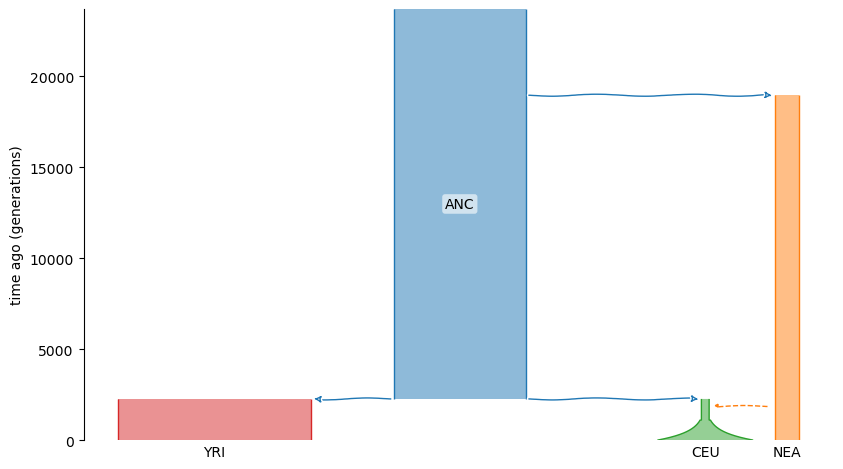

In [21]:


b = demes.Builder(
    description="A composite hominin model with demographic parameters taken from  Gower et al. (2021) and sampled from a normal distribution ",
    time_units="generations"
)
b.add_deme("ANC", epochs=[dict(end_time=2265.5172413793102, start_size=18500.0)])
b.add_deme("NEA", ancestors=["ANC"], start_time=18965.51724137931, epochs=[dict(start_size=3400.0)])
b.add_deme("CEU", ancestors=["ANC"],  epochs=[dict(end_time=1100.0, start_size=1080.0), dict(start_size=1450.0, end_size=13377.357734109575)])
b.add_deme("YRI", ancestors=["ANC"], epochs=[dict(start_size=27000.0)])
b.add_pulse(sources=["NEA"], dest="CEU", time=1896.551724137931, proportions= [0.0225])
my_graph = b.resolve()
demes.dump(my_graph, "test.yaml")
w = demesdraw.utils.separation_heuristic(my_graph)
positions = dict( NEA=1.75*w, CEU=1.5*w, YRI=0 * w, ANC=.75*w,)
ax = demesdraw.tubes(my_graph, positions=positions)

SPS Model

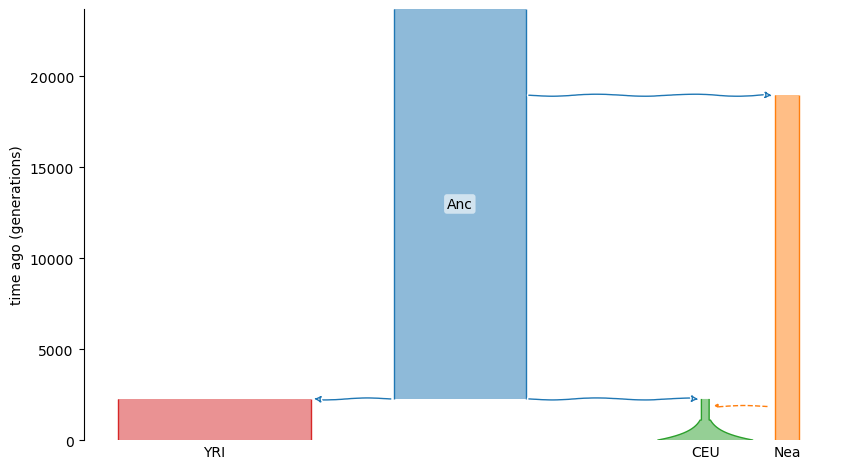

In [14]:
graph = demes.load("HumanNeanderthal_4G21.yaml")
w = demesdraw.utils.separation_heuristic(graph)
positions = dict( Nea=1.75*w, CEU=1.5*w, YRI=0 * w, Anc=.75*w,)
ax = demesdraw.tubes(graph, positions=positions)
# ax.figure.savefig("AmericanAdmixture_4B11_tubes_custom.svg")

Skov Model

In [16]:

admixtureproportion = 25
# Generation time, mutation rate and recomination rate
gen_time = 29.0 
mu = 1.25e-8 

# Population sizes
N_DE = 7419
N_AR = 5000
N_AF = 27122
N_Europe = 3899
N_Asia = 5054
N_ME = 4947

N_ancestral_eurasians = 7264
N_ancestral_humans = 23275
N_neanderthal_human_ancestral = 18296

N_bottleneck_Aus = 136
N_bottleneck_eurasians = 1305
N_bottleneck_nonAfricans = 781

# Split Times
T_human_archaic = 656908 / gen_time
T_bottleneck_nonAfricans = 72041 / gen_time
T_australian = 57944 / gen_time
T_eurasians = 57100 / gen_time
T_europa_asia = 41997 / gen_time

# Bottleneck duration
T_bottlenecks = 100

# Admixture times
T_GF_DE = 43945 / gen_time

# Number of samples
n_AF = 500
n_ME = 20
n_DE = 2
n_Asians = 100
n_europeans = 100
t_DE = 2330.0 

samples = [msp.Sample(0, 0)] * n_AF + [msp.Sample(3, 0)] * n_ME + [msp.Sample(4, t_DE)] * n_DE + [msp.Sample(2, 0)] * n_Asians+ [msp.Sample(1, 0)] * n_europeans

population_configurations = [
    msp.PopulationConfiguration(initial_size = N_AF),
    msp.PopulationConfiguration(initial_size = N_Europe),
    msp.PopulationConfiguration(initial_size = N_Asia),
    msp.PopulationConfiguration(initial_size = N_ME), 
    msp.PopulationConfiguration(initial_size = N_DE)
]

demographic_events = [
    
    # Europa and asia merge and change the amount of sharing with australians and ghost
    msp.MassMigration(
        time = T_europa_asia, source = 2, destination = 1, proportion = 1.0),

    msp.PopulationParametersChange(
        time = T_europa_asia, initial_size = N_ancestral_eurasians, growth_rate = 0, population_id = 1),

    # Denisovan admixture into australians
    msp.MassMigration(
            time = T_GF_DE, source = 3, destination = 4, proportion = float(admixtureproportion)/100.0),

    # Eurasians experience bottleneck; Australian bottleneck onset
    msp.PopulationParametersChange(
        time = T_eurasians - T_bottlenecks, initial_size = N_bottleneck_eurasians, growth_rate = 0, population_id = 1),

    msp.PopulationParametersChange(
        time = T_australian - T_bottlenecks, initial_size = N_bottleneck_Aus, growth_rate = 0, population_id = 3),

    msp.PopulationParametersChange(
        time = T_eurasians, initial_size = N_ancestral_eurasians, growth_rate = 0, population_id = 1),

    # Australians merge into Eurasian
    msp.MassMigration(
        time = T_australian, source = 3, destination = 1, proportion = 1.0),

    # Out of africa bottleneck in Eurasians
    msp.PopulationParametersChange(
        time = T_bottleneck_nonAfricans - T_bottlenecks, initial_size = N_bottleneck_nonAfricans, growth_rate = 0, population_id = 1),

    # Eurasians finish bottleneck and merge into Africans
    msp.MassMigration(
        time = T_bottleneck_nonAfricans, source = 1, destination = 0, proportion = 1.0),
    msp.PopulationParametersChange(
        time = T_bottleneck_nonAfricans, initial_size = N_ancestral_humans, growth_rate = 0, population_id = 0),


    # Denisova migrate into human population 650,000 years ago
    msp.MassMigration(
        time = T_human_archaic, source = 4, destination = 0, proportion = 1.0),

    msp.PopulationParametersChange(
         time = T_human_archaic, initial_size = N_neanderthal_human_ancestral, growth_rate = 0, population_id = 0), 
 

]
Demography = msprime.Demography()
d=Demography.from_old_style(population_configurations=population_configurations, 
                            demographic_events=demographic_events)


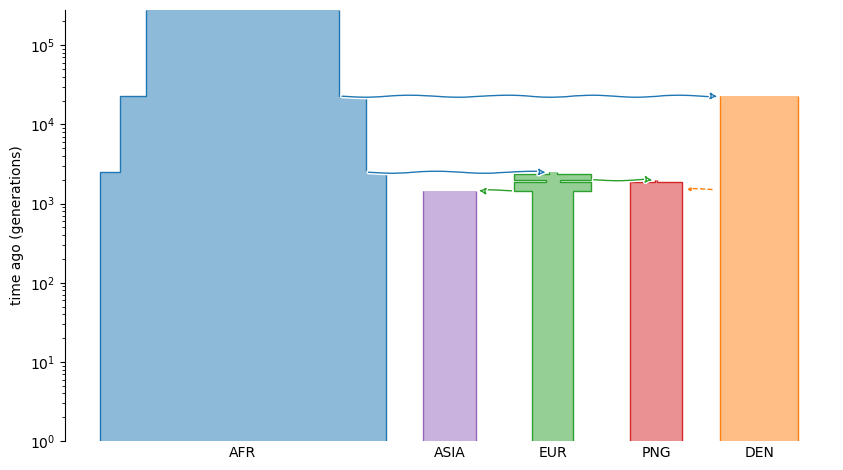

In [33]:
my_graph = demes.load("Skov.yaml")
# demes.dump(d.to_demes(), "Skov.yaml")
w = demesdraw.utils.separation_heuristic(my_graph)
positions = dict( AFR=0*w, EUR=0.6*w, ASIA=0.4 * w, PNG=.8*w, DEN=1*w)
ax = demesdraw.tubes(my_graph, positions=positions,  log_time=True)

Sankararaman Model 2012

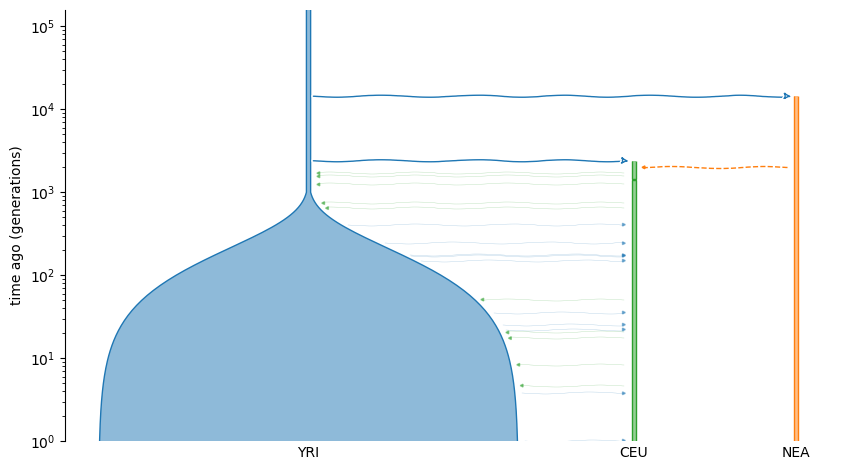

In [63]:
b = demes.Builder(
    description="Model from Sankararam et. al. 2012 PLOS Genetics",
    time_units="generations"
)
b.add_deme("YRI",  epochs=[dict(end_time = 1000, start_size=10000), dict(start_size=10000, end_size=1000000)])
b.add_deme("NEA", ancestors=["YRI"], start_time=14400, epochs=[dict(start_size=10000.0)])
b.add_deme("CEU", ancestors=["YRI"], start_time=2400, epochs=[dict(end_time = 1440,start_size=10000.0), dict(end_time = 1400,start_size=320),   dict(end_time = 0,start_size=10000)])
b.add_pulse(sources=["NEA"], dest="CEU", time=2000, proportions= [0.03])
b.add_migration(demes=['YRI', 'CEU'], rate = 1/150)
my_graph = b.resolve()
demes.dump(my_graph, "Sankararaman.yaml")
w = demesdraw.utils.separation_heuristic(my_graph)
positions = dict( NEA=.75*w, CEU=0.5*w, YRI=0 * w)
ax = demesdraw.tubes(my_graph, positions= positions, log_time=True)

Durvasula 2019 & Sankararaman 2012

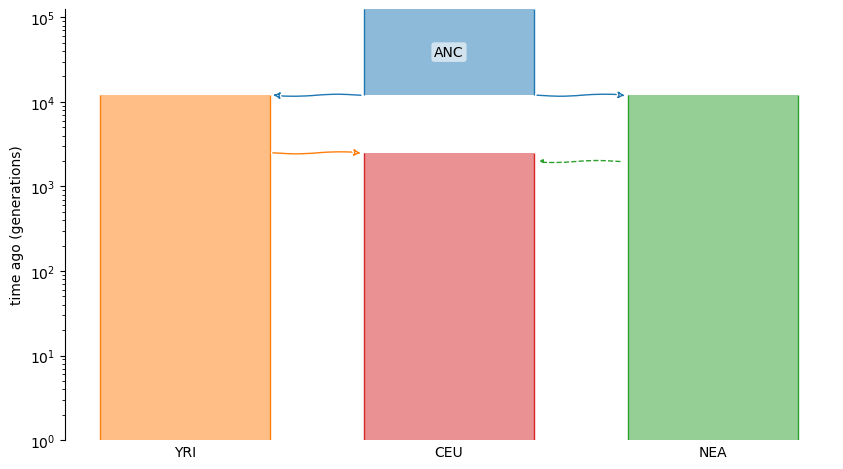

In [74]:
b = demes.Builder(
    description="Model from Sankararam et. al. 2014 Nature, found through Durvsaula 2019 Plos Genetics",
    time_units="generations"
)
b.add_deme("ANC",  epochs=[dict(end_time = 12000, start_size=10000)])
b.add_deme("YRI",  ancestors=["ANC"], epochs=[dict(start_size=10000)])
b.add_deme("NEA", ancestors=["ANC"],  epochs=[dict(start_size=10000.0)])
b.add_deme("CEU", ancestors=["YRI"], start_time = 2500, epochs=[dict(start_size=10000.0)])
b.add_pulse(sources=["NEA"], dest="CEU", time=2000, proportions= [0.02])
my_graph = b.resolve()
demes.dump(my_graph, "Durvasula.yaml")
w = demesdraw.utils.separation_heuristic(my_graph)
# positions = dict( NEA=.5*w, CEU=0.25*w, YRI=.75 * w, ANC= 0.25*w)
ax = demesdraw.tubes(my_graph, log_time=True)